In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

import pandas as pd
from matplotlib.ticker import LogFormatter 
from scipy.optimize import curve_fit
from pathlib import Path
import matplotlib.colors
from matplotlib import ticker, cm
import pickle

from scipy.stats import norm

#%matplotlib notebook

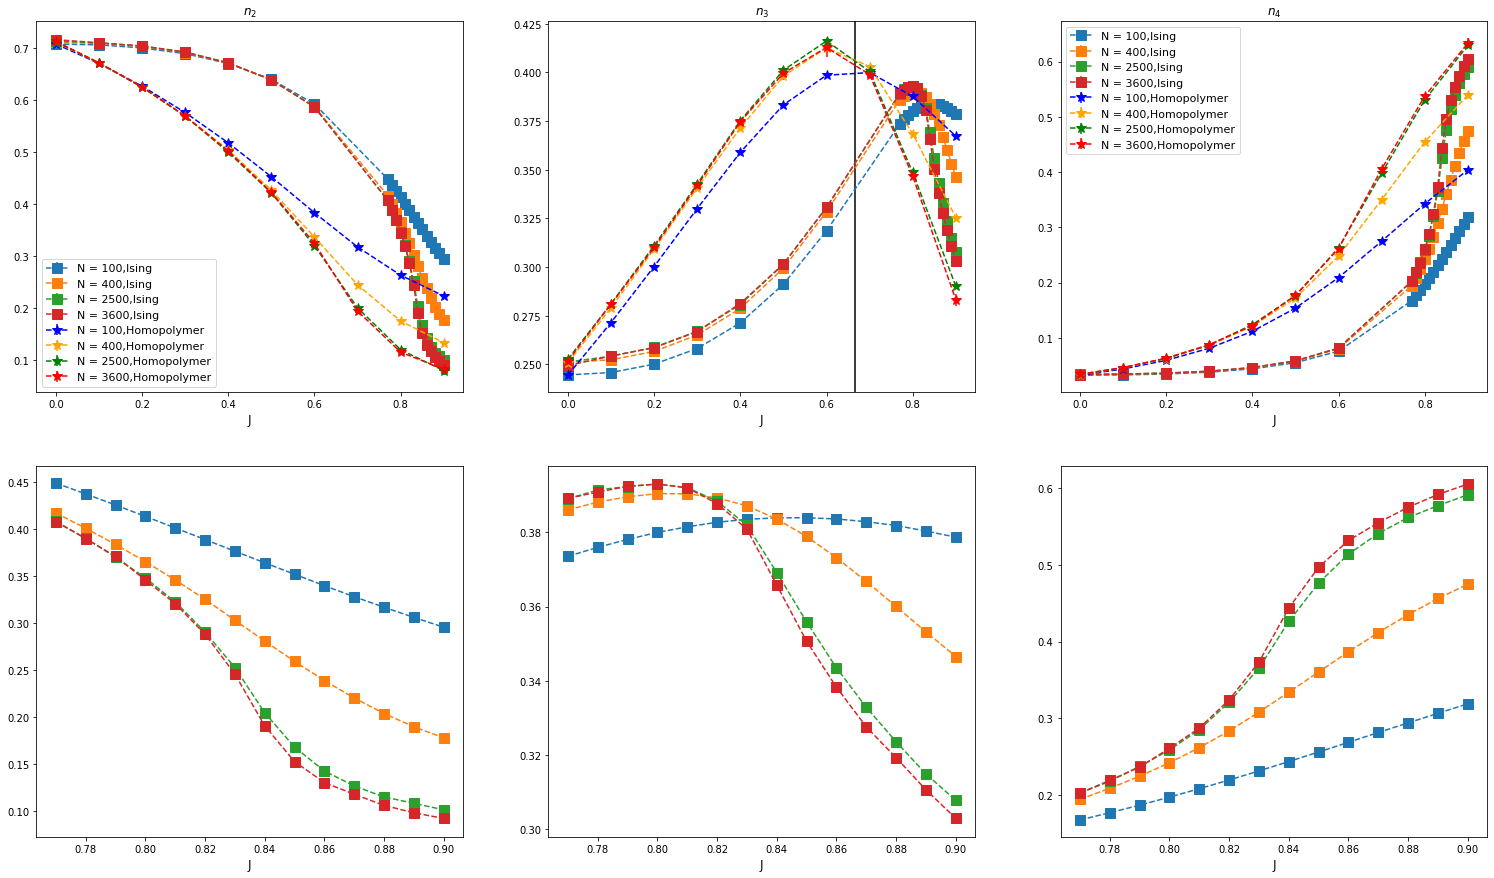

In [2]:
fig, axes = plt.subplots(2, 3, figsize=(26,15)) #,  sharey='row')
axes = axes.reshape(-1)

data_np = np.loadtxt("Ising/bulk/longnear.txt", skiprows=0)
data_np1 = np.loadtxt("Ising/bulk/far.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))
y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])


for l in lengths:

    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]

    axes[0].errorbar(J_l, data_l[:,20], yerr=data_l[:,21], fmt="s--", ms = 10, label = "N = " + str(int(l)) + ",Ising")
    axes[1].errorbar(J_l, data_l[:,22], yerr=data_l[:,23], fmt="s--", ms = 10, label = "N = " + str(int(l)) + ",Ising")
    axes[2].errorbar(J_l, data_l[:,24], yerr=data_l[:,25], fmt="s--", ms = 10, label = "N = " + str(int(l)) + ",Ising")
    
  
data_np = np.loadtxt("Homopolymer_simulations/Canonical/far.txt", skiprows=0)    
lengths = np.unique(data_np[:, 0])
cols = ["b", "orange", "green", "red"]
i = 0
for l in lengths:

    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]

    axes[0].errorbar(J_l, data_l[:,20], yerr=data_l[:,21], c=cols[i], fmt="*--", ms = 10, label = "N = " + str(int(l)) + ",Homopolymer")
    axes[1].errorbar(J_l, data_l[:,22], yerr=data_l[:,23], c=cols[i],fmt="*--", ms = 10, label = "N = " + str(int(l)) + ",Homopolymer")
    axes[2].errorbar(J_l, data_l[:,24], yerr=data_l[:,25], c=cols[i], fmt="*--", ms = 10, label = "N = " + str(int(l)) + ",Homopolymer")
    i+=1
axes[1].axvline(0.667, c ="k")    
     
    
data_np = np.loadtxt("Ising/bulk/longnear.txt", skiprows=0)    
lengths = np.unique(data_np[:, 0])
for l in lengths:

    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]    
    axes[3].errorbar(J_l, data_l[:,20], yerr=data_l[:,21], fmt="s--", ms = 10, label = "N = " + str(l))
    axes[4].errorbar(J_l, data_l[:,22], yerr=data_l[:,23], fmt="s--", ms = 10, label = "N = " + str(l))
    axes[5].errorbar(J_l, data_l[:,24], yerr=data_l[:,25], fmt="s--", ms = 10, label = "N = " + str(l))
    
axes[0].set_title(r'$n_2$')    
axes[1].set_title(r'$n_3$')    
axes[2].set_title(r'$n_4$')    

 

axes[0].legend(fontsize = 11)
#axes[1].legend(fontsize = 10)
axes[2].legend(fontsize = 11)


for i in range(6):
    axes[i].set_xlabel("J", fontsize=12)

plt.savefig("/home/kamilla/Lattice_models/img/bulk.png")

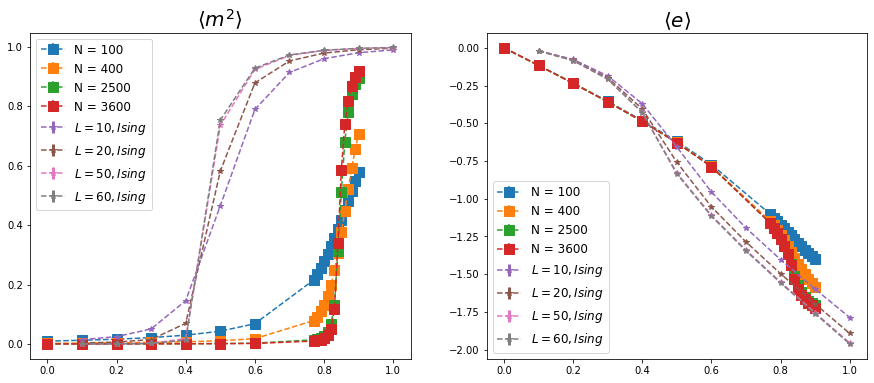

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(15,6)) #,  sharey='row')
axes = axes.reshape(-1)

data_np = np.loadtxt("Ising/bulk/longnear.txt", skiprows=0)
data_np1 = np.loadtxt("Ising/bulk/far.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))
y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])


for l in lengths:

    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]

    axes[0].errorbar(J_l, data_l[:,15], yerr=data_l[:,16], fmt="s--", ms = 10, label = "N = " + str(int(l)))
    axes[1].errorbar(J_l, data_l[:,7], yerr=data_l[:,8], fmt="s--", ms = 10, label = "N = "  + str(int(l)))
 

df = pd.read_csv("Ising/resultsIsing2D.txt", sep = " ")
 
for L, grp in df.groupby("L"):
    #print( grp["avM2"],grp['J'] )
    axes[0].errorbar( grp['J'], grp["avM2"],
               yerr= grp["errM2"],    
                fmt='*--', elinewidth=3, label=r"$L=%s, Ising$" % L)
    
    axes[1].errorbar( grp['J'], grp["avE"],
               yerr= grp["errE"],    
                fmt='*--', elinewidth=3, label=r"$L=%s, Ising$" % L)

axes[0].set_title(r'$\langle m^2 \rangle$', fontsize = 20)    
axes[1].set_title(r'$\langle e \rangle$', fontsize = 20)    

axes[0].legend(fontsize = 12)
axes[1].legend(fontsize = 12)


plt.savefig("/home/kamilla/Lattice_models/img/2dising.png")

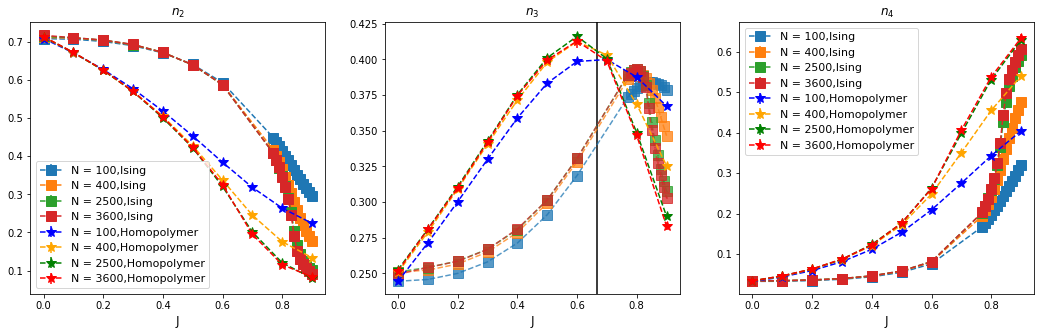

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(18,5)) #,  sharey='row')
axes = axes.reshape(-1)

data_np = np.loadtxt("Ising/bulk/longnear.txt", skiprows=0)
data_np1 = np.loadtxt("Ising/bulk/far.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))
y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])


for l in lengths:

    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]

    axes[0].errorbar(J_l, data_l[:,20], yerr=data_l[:,21], fmt="s--", ms = 10, label = "N = " + str(int(l)) + ",Ising")
    axes[1].errorbar(J_l, data_l[:,22], yerr=data_l[:,23], alpha = 0.75, fmt="s--", ms = 10, label = "N = " + str(int(l)) + ",Ising")
    axes[2].errorbar(J_l, data_l[:,24], yerr=data_l[:,25], fmt="s--", ms = 10, label = "N = " + str(int(l)) + ",Ising")
    
  
data_np = np.loadtxt("Homopolymer_simulations/Canonical/far.txt", skiprows=0)    
lengths = np.unique(data_np[:, 0])
cols = ["b", "orange", "green", "red"]
i = 0
for l in lengths:

    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]

    axes[0].errorbar(J_l, data_l[:,20], yerr=data_l[:,21], c=cols[i], fmt="*--", ms = 10, label = "N = " + str(int(l)) + ",Homopolymer")
    axes[1].errorbar(J_l, data_l[:,22], yerr=data_l[:,23], c=cols[i],fmt="*--", ms = 10, label = "N = " + str(int(l)) + ",Homopolymer")
    axes[2].errorbar(J_l, data_l[:,24], yerr=data_l[:,25], c=cols[i], fmt="*--", ms = 10, label = "N = " + str(int(l)) + ",Homopolymer")
    i+=1
axes[1].axvline(0.667, c ="k")    
 
    
axes[0].set_title(r'$n_2$')    
axes[1].set_title(r'$n_3$')    
axes[2].set_title(r'$n_4$')    


axes[0].legend(fontsize = 11)
#axes[1].legend(fontsize = 10)
axes[2].legend(fontsize = 11)


for i in range(3):
    axes[i].set_xlabel("J", fontsize=12)

plt.savefig("/home/kamilla/Lattice_models/img/bulk_compare.png")

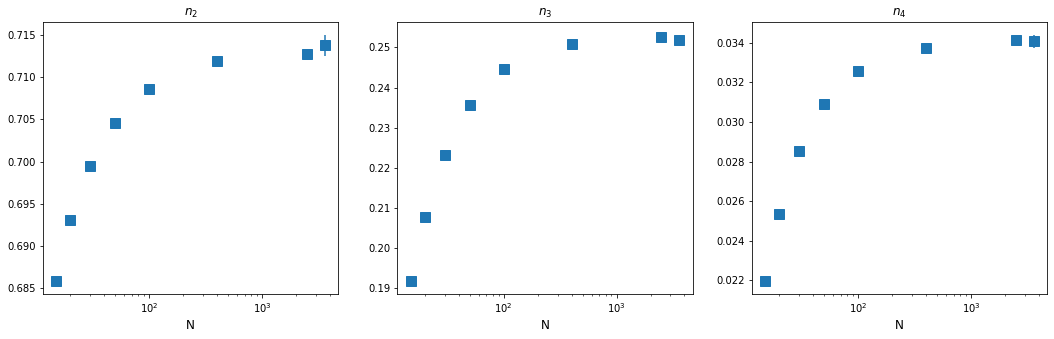

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18,5)) #,  sharey='row')
axes = axes.reshape(-1)

data_np = np.loadtxt("Homopolymer_simulations/Canonical/zero.txt", skiprows=0)


lengths = data_np[:, 0]

axes[0].errorbar(lengths, data_np[:,20], yerr=data_np[:,21],  fmt="s", ms = 10, label = "j = 0"  )
axes[1].errorbar(lengths, data_np[:,22], yerr=data_np[:,23],  fmt="s", ms = 10, label = "j = 0"  )
axes[2].errorbar(lengths, data_np[:,24], yerr=data_np[:,25],  fmt="s", ms = 10, label = "j = 0"  )
    
axes[0].set_title(r'$n_2$')    
axes[1].set_title(r'$n_3$')    
axes[2].set_title(r'$n_4$')    
for i in range(3):
    axes[i].set_xlabel("N", fontsize=12)
    axes[i].set_xscale('log')

plt.savefig("/home/kamilla/Lattice_models/img/bulk_j0.png")    

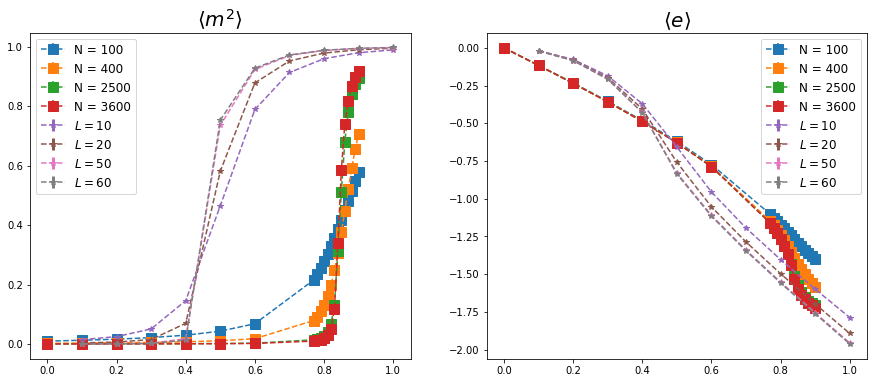

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(15,6)) #,  sharey='row')
axes = axes.reshape(-1)

data_np = np.loadtxt("Ising/bulk/longnear.txt", skiprows=0)
data_np1 = np.loadtxt("Ising/bulk/far.txt", skiprows=0)
data_np = np.vstack((data_np, data_np1))
y= np.argsort(data_np[:, 1],kind='mergesort')
data_np=data_np[y]

lengths = np.unique(data_np[:, 0])


for l in lengths:

    data_l = data_np[data_np[:,0]==l]
    J_l = data_l[:, 1]

    axes[0].errorbar(J_l, data_l[:,15], yerr=data_l[:,16], fmt="s--", ms = 10, label = "N = " + str(int(l)))
    axes[1].errorbar(J_l, data_l[:,7], yerr=data_l[:,8], fmt="s--", ms = 10, label = "N = "  + str(int(l)))
 

df = pd.read_csv("Ising/resultsIsing2D.txt", sep = " ")
 
for L, grp in df.groupby("L"):
    #print( grp["avM2"],grp['J'] )
    axes[0].errorbar( grp['J'], grp["avM2"],
               yerr= grp["errM2"],    
                fmt='*--', elinewidth=3, label=r"$L=%s$" % L)
    
    axes[1].errorbar( grp['J'], grp["avE"],
               yerr= grp["errE"],    
                fmt='*--', elinewidth=3, label=r"$L=%s$" % L)

axes[0].set_title(r'$\langle m^2 \rangle$', fontsize = 20)    
axes[1].set_title(r'$\langle e \rangle$', fontsize = 20)    

axes[0].legend(fontsize = 12)
axes[1].legend(fontsize = 12)


plt.savefig("/home/kamilla/Lattice_models/img/1dising.png")